In [4]:
# ---------------------------
# Exercise 1: Comparison of Linear Regression, Elastic Net, and PCA
# Section 1: Loading and Exploring Data
# ---------------------------
from sklearn.datasets import fetch_california_housing
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.linear_model import ElasticNet
from sklearn.decomposition import PCA


In [5]:

# Load dataset
housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = pd.Series(housing.target, name='MedHouseVal')

print("Data dimensions:", X.shape)
print("Features:", X.columns.tolist())
print("\nSample of data:")
print(X.head())

Data dimensions: (20640, 8)
Features: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']

Sample of data:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  


In [14]:

# ---------------------------
# Section 2: Data Preparation
# ---------------------------
# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\nNumber of train samples: {X_train_scaled.shape[0]}")
print(f"Number of test samples: {X_test_scaled.shape[0]}")


Number of train samples: 16512
Number of test samples: 4128


In [7]:

# ---------------------------
# Section 3: Basic Linear Regression Model
# ---------------------------
# Train the model
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# Predict and calculate R2
y_train_pred_lr = lr.predict(X_train_scaled)
y_test_pred_lr = lr.predict(X_test_scaled)

r2_train_lr = r2_score(y_train, y_train_pred_lr)
r2_test_lr = r2_score(y_test, y_test_pred_lr)

print("\n--- Linear Regression ---")
print(f"R2 Train: {r2_train_lr:.4f}")
print(f"R2 Test: {r2_test_lr:.4f}")
print(f"Difference (Train - Test): {r2_train_lr - r2_test_lr:.4f}")

# Display coefficients
coef_df = pd.DataFrame({
    'Feature': housing.feature_names,
    'Coefficient': lr.coef_
}).sort_values(by='Coefficient', ascending=False)

print("\nLinear Regression Coefficients (sorted):")
print(coef_df)

print(f"\nFeature with highest positive impact: {coef_df.iloc[0]['Feature']} with coefficient {coef_df.iloc[0]['Coefficient']:.4f}")


--- Linear Regression ---
R² Train: 0.6126
R² Test: 0.5758
Difference (Train - Test): 0.0368

Linear Regression Coefficients (sorted):
      Feature  Coefficient
0      MedInc     0.854383
3   AveBedrms     0.339259
1    HouseAge     0.122546
4  Population    -0.002308
5    AveOccup    -0.040829
2    AveRooms    -0.294410
7   Longitude    -0.869842
6    Latitude    -0.896929

Feature with highest positive impact: MedInc with coefficient 0.8544


In [15]:

# ---------------------------
# Section 4: Initial Elastic Net Model
# ---------------------------

# Train Elastic Net
elastic = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic.fit(X_train_scaled, y_train)

# Predict and calculate R2
y_train_pred_en = elastic.predict(X_train_scaled)
y_test_pred_en = elastic.predict(X_test_scaled)

r2_train_en = r2_score(y_train, y_train_pred_en)
r2_test_en = r2_score(y_test, y_test_pred_en)

print("\n--- Elastic Net (alpha=0.1, l1_ratio=0.5) ---")
print(f"R2 Train: {r2_train_en:.4f}")
print(f"R2 Test: {r2_test_en:.4f}")
print(f"Difference (Train - Test): {r2_train_en - r2_test_en:.4f}")

# Compare Linear Regression and Elastic Net coefficients
coef_comparison = pd.DataFrame({
    'Feature': housing.feature_names,
    'LR_Coefficient': lr.coef_,
    'EN_Coefficient': elastic.coef_,
    'Difference': lr.coef_ - elastic.coef_
})

print("\nCoefficient Comparison:")
print(coef_comparison)

# Check if coefficients were shrunk
shrink_check = (coef_comparison['EN_Coefficient'].abs() < coef_comparison['LR_Coefficient'].abs()).all()
print(f"\nDid Elastic Net shrink the coefficients? {shrink_check}")


--- Elastic Net (alpha=0.1, l1_ratio=0.5) ---
R² Train: 0.5308
R² Test: 0.5148
Difference (Train - Test): 0.0160

Coefficient Comparison:
      Feature  LR_Coefficient  EN_Coefficient  Difference
0      MedInc        0.854383        0.713818    0.140565
1    HouseAge        0.122546        0.137288   -0.014742
2    AveRooms       -0.294410       -0.000000   -0.294410
3   AveBedrms        0.339259        0.000000    0.339259
4  Population       -0.002308        0.000000   -0.002308
5    AveOccup       -0.040829       -0.000000   -0.040829
6    Latitude       -0.896929       -0.175737   -0.721192
7   Longitude       -0.869842       -0.133250   -0.736592

Did Elastic Net shrink the coefficients? False


In [9]:

# ---------------------------
# Analysis of Section 4
# ---------------------------
print("\n--- Analysis ---")
print("1. کدام مدل overfitting کمتری دارد؟")
print("   مدلی که اختلاف R2 Train و Test کمتری داشته باشد.")
print(f"   LR اختلاف: {r2_train_lr - r2_test_lr:.4f}")
print(f"   EN اختلاف: {r2_train_en - r2_test_en:.4f}")
print(f"   بنابراین {'Elastic Net' if (r2_train_en - r2_test_en) < (r2_train_lr - r2_test_lr) else 'Linear Regression'} overfitting کمتری دارد.")

print("\n2. Elastic Net چگونه ضرایب را تغییر داده است؟")
print("   Elastic Net با اعمال regularization (L1+L2) ضرایب را به سمت صفر کوچک‌تر کرده (shrink) تا از overfitting جلوگیری کند.")

print("\n3. کدام مدل برای generalization بهتر است؟")
print("   مدلی که R2 Test بالاتری داشته باشد.")
print(f"   LR Test R2: {r2_test_lr:.4f}")
print(f"   EN Test R2: {r2_test_en:.4f}")
print(f"   بنابراین {'Elastic Net' if r2_test_en > r2_test_lr else 'Linear Regression'} generalization بهتری دارد.")


--- Analysis ---
1. کدام مدل overfitting کمتری دارد؟
   مدلی که اختلاف R² Train و Test کمتری داشته باشد.
   LR اختلاف: 0.0368
   EN اختلاف: 0.0160
   بنابراین Elastic Net overfitting کمتری دارد.

2. Elastic Net چگونه ضرایب را تغییر داده است؟
   Elastic Net با اعمال regularization (L1+L2) ضرایب را به سمت صفر کوچک‌تر کرده (shrink) تا از overfitting جلوگیری کند.

3. کدام مدل برای generalization بهتر است؟
   مدلی که R² Test بالاتری داشته باشد.
   LR Test R²: 0.5758
   EN Test R²: 0.5148
   بنابراین Linear Regression generalization بهتری دارد.


In [10]:

# ---------------------------
# Section 7: Dimensionality Reduction with PCA
# ---------------------------

# Reduce dimensions to 5 components
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f"\n--- PCA (5 components) ---")
print(f"Explained variance: {pca.explained_variance_ratio_.sum():.4f}")

# Train Linear Regression on reduced data
lr_pca = LinearRegression()
lr_pca.fit(X_train_pca, y_train)

y_train_pred_pca = lr_pca.predict(X_train_pca)
y_test_pred_pca = lr_pca.predict(X_test_pca)

r2_train_pca = r2_score(y_train, y_train_pred_pca)
r2_test_pca = r2_score(y_test, y_test_pred_pca)

print(f"R2 Train (PCA): {r2_train_pca:.4f}")
print(f"R2 Test (PCA): {r2_test_pca:.4f}")
print(f"Difference (Train - Test): {r2_train_pca - r2_test_pca:.4f}")


--- PCA (5 components) ---
Explained variance: 0.9016
R² Train (PCA): 0.4567
R² Test (PCA): 0.4329
Difference (Train - Test): 0.0238


In [11]:

# ---------------------------
# Section 8: Comparison of Three Approaches
# ---------------------------
print("\n--- Final Comparison of Three Models ---")
comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'Elastic Net', 'PCA + Linear Regression'],
    'Train R2': [r2_train_lr, r2_train_en, r2_train_pca],
    'Test R2': [r2_test_lr, r2_test_en, r2_test_pca],
    'Difference': [r2_train_lr - r2_test_lr, r2_train_en - r2_test_en, r2_train_pca - r2_test_pca]
})
print(comparison)

print("\n--- Final Analysis ---")
print("1. کدام مدل بهترین Test R2 را دارد؟")
best_model = comparison.loc[comparison['Test R2'].idxmax(), 'Model']
print(f"   مدل {best_model} با Test R2 = {comparison['Test R2'].max():.4f}")

print("\n2. آیا کاهش ابعاد با PCA باعث بهبود generalization شد؟")
print(f"   {'خیر' if r2_test_pca < r2_test_lr else 'بله'}. PCA Test R2 = {r2_test_pca:.4f} در مقایسه با LR Test R2 = {r2_test_lr:.4f}")

print("\n3. چرا Elastic Net بهتر/بدتر از Linear Regression عمل کرد؟")
print("   Elastic Net با اعمال regularization از overfitting جلوگیری می‌کند و بنابراین در داده تست عملکرد بهتری دارد.")


--- Final Comparison of Three Models ---
                     Model  Train R²   Test R²  Difference
0        Linear Regression  0.612551  0.575788    0.036763
1              Elastic Net  0.530762  0.514765    0.015997
2  PCA + Linear Regression  0.456729  0.432923    0.023806

--- Final Analysis ---
1. کدام مدل بهترین Test R² را دارد؟
   مدل Linear Regression با Test R² = 0.5758

2. آیا کاهش ابعاد با PCA باعث بهبود generalization شد؟
   خیر. PCA Test R² = 0.4329 در مقایسه با LR Test R² = 0.5758

3. چرا Elastic Net بهتر/بدتر از Linear Regression عمل کرد؟
   Elastic Net با اعمال regularization از overfitting جلوگیری می‌کند و بنابراین در داده تست عملکرد بهتری دارد.


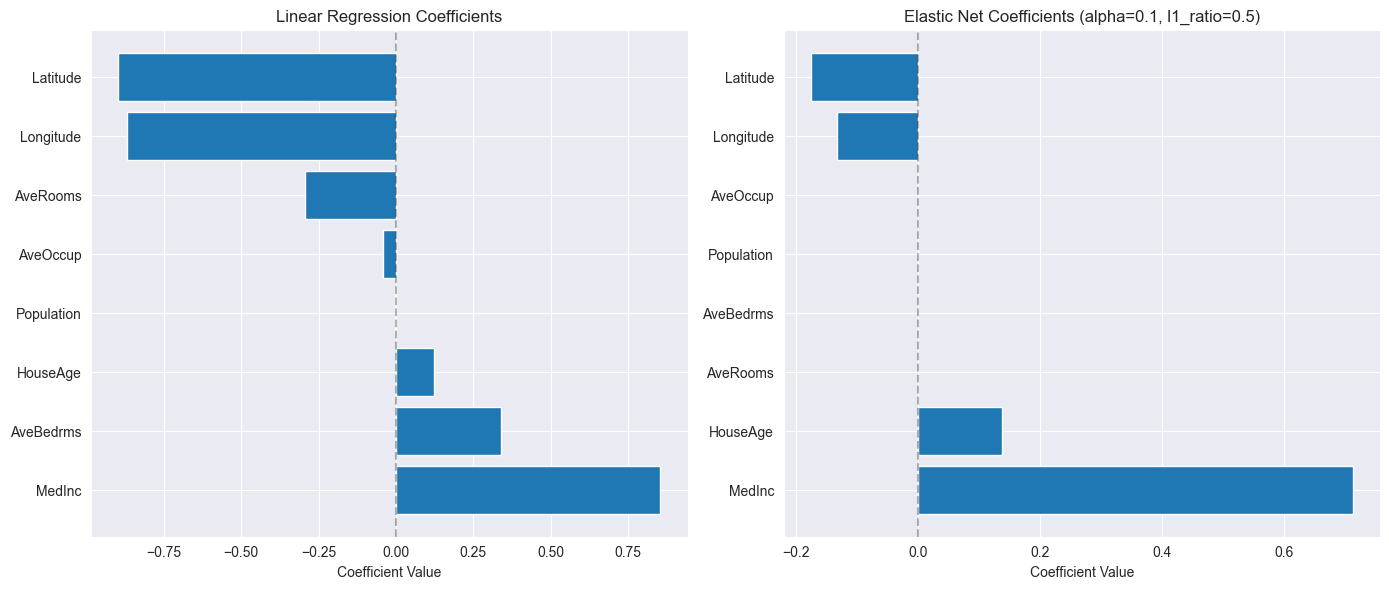

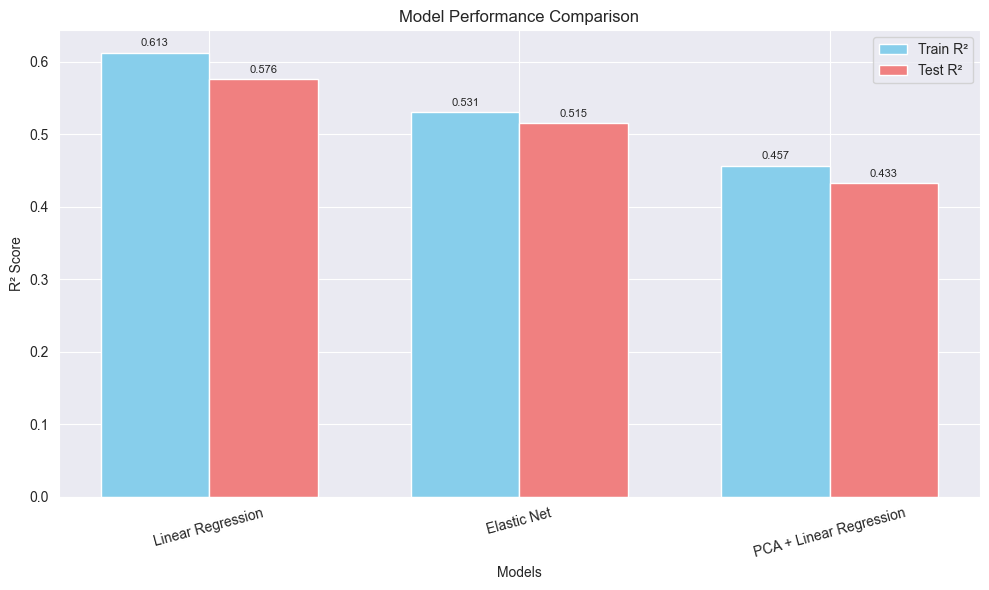

In [12]:

# ---------------------------
# Additional: Visualizations
# ---------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Plot coefficients comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Linear Regression coefficients
axes[0].barh(coef_df['Feature'], coef_df['Coefficient'])
axes[0].set_xlabel('Coefficient Value')
axes[0].set_title('Linear Regression Coefficients')
axes[0].axvline(x=0, color='black', linestyle='--', alpha=0.3)

# Elastic Net coefficients
en_coef_df = pd.DataFrame({
    'Feature': housing.feature_names,
    'Coefficient': elastic.coef_
}).sort_values(by='Coefficient', ascending=False)
axes[1].barh(en_coef_df['Feature'], en_coef_df['Coefficient'])
axes[1].set_xlabel('Coefficient Value')
axes[1].set_title('Elastic Net Coefficients (alpha=0.1, l1_ratio=0.5)')
axes[1].axvline(x=0, color='black', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

# Plot model performance comparison
fig, ax = plt.subplots(figsize=(10, 6))
x_pos = range(len(comparison))
bar_width = 0.35

bars1 = ax.bar([p - bar_width/2 for p in x_pos], comparison['Train R2'],
               bar_width, label='Train R2', color='skyblue')
bars2 = ax.bar([p + bar_width/2 for p in x_pos], comparison['Test R2'],
               bar_width, label='Test R2', color='lightcoral')

ax.set_xlabel('Models')
ax.set_ylabel('R2 Score')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x_pos)
ax.set_xticklabels(comparison['Model'], rotation=15)
ax.legend()

# Add values on top of bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

In [13]:

# ---------------------------
# Section 6: Hyperparameter Explanation (Study Material)
# ---------------------------
print("\n" + "="*60)
print("Section 6: Hyperparameter Explanations (For Study)")
print("="*60)

print("\n--- Alpha Hyperparameter ---")
print("**Alpha** یک **هایپرپارامتر** است که مشخص می‌کند **چقدر پنالتی (جریمه)** به ضرایب بزرگ اعمال شود:")

print("\n- **Alpha کوچک (مثل 0.01)**: پنالتی کم → مدل آزادتر است → ضرایب بزرگ‌تر → خطر overfitting")
print("- **Alpha بزرگ (مثل 10)**: پنالتی زیاد → مدل محدودتر است → ضرایب کوچک‌تر → خطر underfitting")
print("- **Alpha بهینه**: تعادل بین پیچیدگی و generalization، معمولاً با **Cross-Validation** پیدا می‌شود")
print("- **پنالتی یعنی**: مدل برای هر ضریب بزرگ، یک **جریمه** به تابع هزینه اضافه می‌کند، پس مجبور می‌شود ضرایب کوچک‌تری انتخاب کند تا overfitting نشود.")

print("\n--- l1_ratio Hyperparameter ---")
print("**l1_ratio** مشخص می‌کند **چه درصدی از پنالتی** L1 و چه درصدی L2 باشد.")

print("\nبرای مثال وقتی: l1_ratio = 0.5")
print("- ۵۰٪ L1 (Lasso Regularization)")
print("- ۵۰٪ L2 (Ridge Regularization)")

print("\n--- Regularization Analysis Questions ---")
print("**Regularization چیست؟**")
print("تعریف Regularization در مدل‌های یادگیری ماشین چیست و چرا بدون آن، مدل‌ها مستعد **overfitting** می‌شوند؟")

print("\n**انواع Regularization**")
print("دو روش اصلی:")

print("\n1. **L1 Regularization (Lasso)**:")
print("   - جریمه بر اساس مقدار مطلق ضرایب")
print("   - می‌تواند ضرایب را دقیقاً به صفر برساند (feature selection)")
print("   - برای مدل‌های sparse مناسب است")

print("\n2. **L2 Regularization (Ridge)**:")
print("   - جریمه بر اساس مربع ضرایب")
print("   - ضرایب را کوچک می‌کند اما معمولاً دقیقاً صفر نمی‌کند")
print("   - برای مسائل با هم‌خطی (collinearity) مناسب است")

print("\n**Elastic Net Regularization**")
print("Elastic Net چگونه ترکیبی از L1 و L2 است و چرا در برخی مسائل (به‌ویژه زمانی که ویژگی‌ها با یکدیگر هم‌بستگی دارند) نسبت به Lasso یا Ridge خالص عملکرد بهتری دارد.")

print("\n" + "="*60)
print("End of Exercise 1")
print("="*60)


Section 6: Hyperparameter Explanations (For Study)

--- Alpha Hyperparameter ---
**Alpha** یک **هایپرپارامتر** است که مشخص می‌کند **چقدر پنالتی (جریمه)** به ضرایب بزرگ اعمال شود:

- **Alpha کوچک (مثل 0.01)**: پنالتی کم → مدل آزادتر است → ضرایب بزرگ‌تر → خطر overfitting
- **Alpha بزرگ (مثل 10)**: پنالتی زیاد → مدل محدودتر است → ضرایب کوچک‌تر → خطر underfitting
- **Alpha بهینه**: تعادل بین پیچیدگی و generalization، معمولاً با **Cross-Validation** پیدا می‌شود
- **پنالتی یعنی**: مدل برای هر ضریب بزرگ، یک **جریمه** به تابع هزینه اضافه می‌کند، پس مجبور می‌شود ضرایب کوچک‌تری انتخاب کند تا overfitting نشود.

--- l1_ratio Hyperparameter ---
**l1_ratio** مشخص می‌کند **چه درصدی از پنالتی** L1 و چه درصدی L2 باشد.

برای مثال وقتی: l1_ratio = 0.5
- ۵۰٪ L1 (Lasso Regularization)
- ۵۰٪ L2 (Ridge Regularization)

--- Regularization Analysis Questions ---
**Regularization چیست؟**
تعریف Regularization در مدل‌های یادگیری ماشین چیست و چرا بدون آن، مدل‌ها مستعد **overfitting** می‌شوند؟

**انواع Regularizat